# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [2]:
import os

output_file = "futures_data.parquet"

if os.path.exists(output_file):
    data = pd.read_parquet(output_file)
else:
    symbols = [ "ES=F", "ZN=F", "GC=F", "DX=F", "CL=F", "ZC=F", "ZW=F", "^VIX", "^RUT" ]
    data = yf.download(symbols)
    data.to_parquet(output_file)

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [3]:
# Resample data to monthly frequency
data = data.resample("ME").last()
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [4]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [5]:
# Subset adjusted close prices and fill NaNs
prices = data["Adj Close"].ffill().dropna()
# Convert index to datetime
prices.index = pd.to_datetime(prices.index)

In [6]:
prices.head()

Ticker,CL=F,DX=F,ES=F,GC=F,ZC=F,ZN=F,ZW=F,^RUT,^VIX
Date,,,,,,,,,
2000-09-30,30.860001,113.000000,1454.00,273.600006,192.0,100.218803,258.00,521.369995,20.570000
2000-10-31,32.689999,116.620003,1440.75,264.899994,196.0,100.703102,253.50,497.679993,23.629999
2000-11-30,33.799999,115.099998,1321.00,270.100006,205.0,102.703102,252.50,445.940002,29.650000
2000-12-31,26.799999,109.279999,1327.00,272.000000,222.5,104.890602,272.75,483.529999,26.850000
2001-01-31,28.700001,110.529999,1373.50,265.600006,208.5,105.484398,271.00,508.339996,22.020000


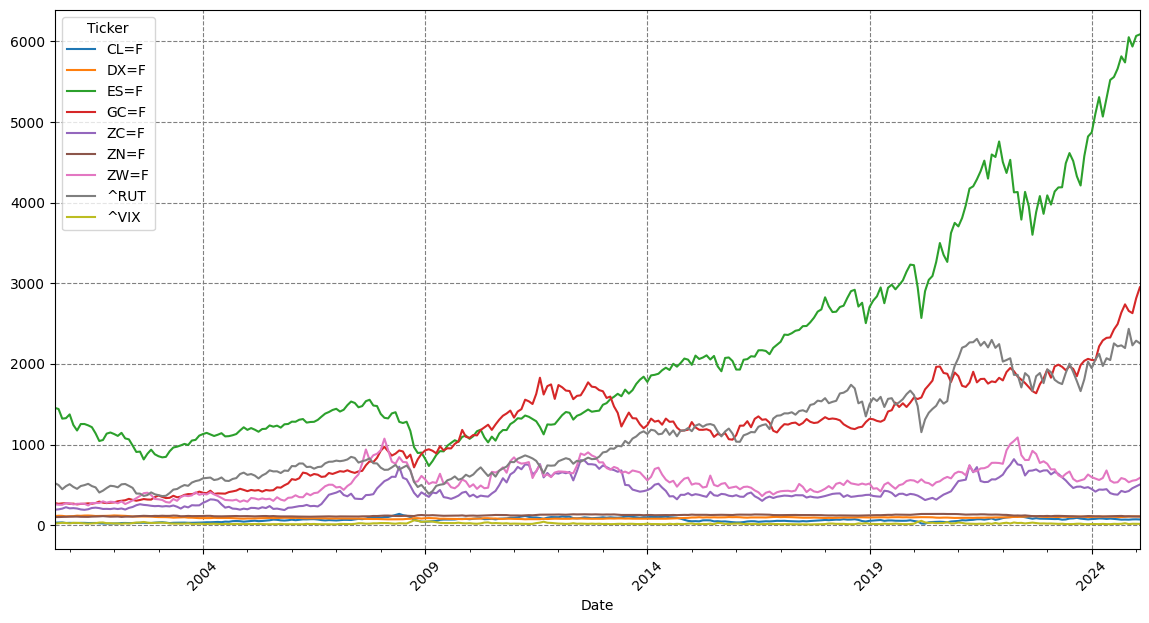

In [7]:
prices.plot(figsize=(14, 7))
plt.grid(True, which='major', linestyle='--', color='grey')
plt.xticks(rotation=45)
plt.show()

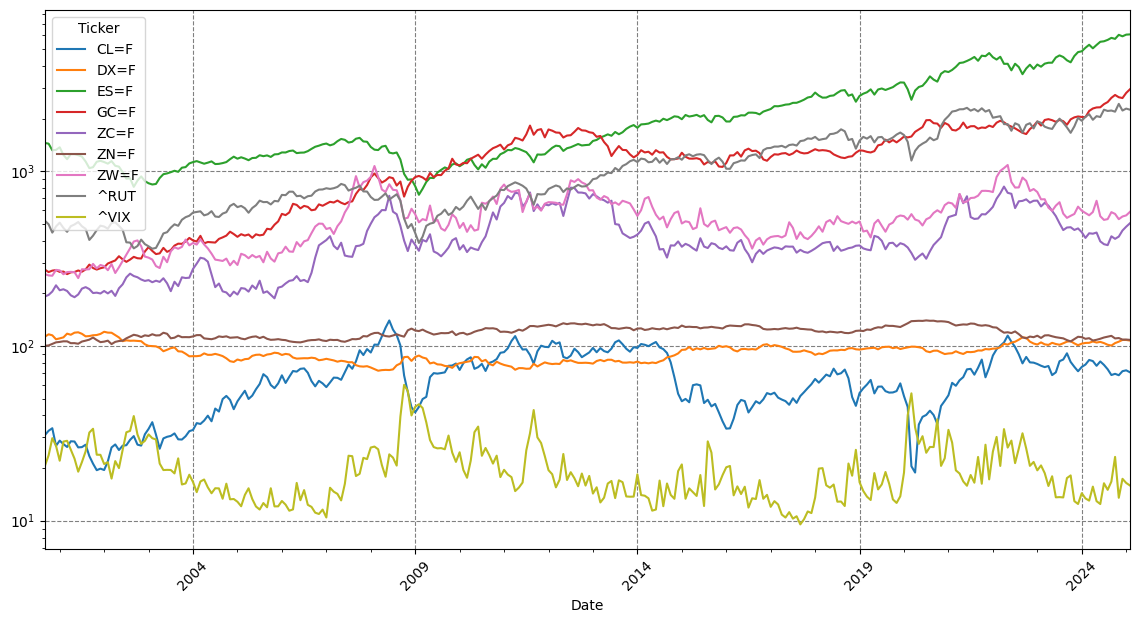

In [8]:
prices.plot(figsize=(14, 7))
plt.yscale("log")
plt.grid(True, which='major', linestyle='--', color='grey')
plt.xticks(rotation=45)
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [9]:
# Compute arithmetic returns
returns = prices.pct_change()

In [10]:
print(returns.tail())

Ticker          CL=F      DX=F      ES=F      GC=F      ZC=F      ZN=F  \
Date                                                                     
2024-10-31  0.015989  0.033396 -0.013028  0.038769 -0.032961 -0.033361   
2024-11-30 -0.018192  0.018772  0.054544 -0.029690  0.029823  0.004950   
2024-12-31  0.054706  0.023321 -0.019127 -0.010463  0.083924 -0.020408   
2025-01-31  0.011294 -0.000729  0.022154  0.069717  0.051254  0.000862   
2025-02-28 -0.024955 -0.007180  0.003132  0.048533  0.045643 -0.004020   

Ticker          ZW=F      ^RUT      ^VIX  
Date                                      
2024-10-31 -0.023116 -0.014942  0.384340  
2024-11-30 -0.067046  0.108383 -0.416667  
2024-12-31  0.036167 -0.084022  0.284234  
2025-01-31  0.014506  0.025796 -0.053026  
2025-02-28  0.046917 -0.013901 -0.032867  


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [11]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda x: x / x.sum(), axis=1)
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)
    return risk_parity_weights.dropna()

risk_parity_weights = compute_risk_parity_weights(returns, 36)

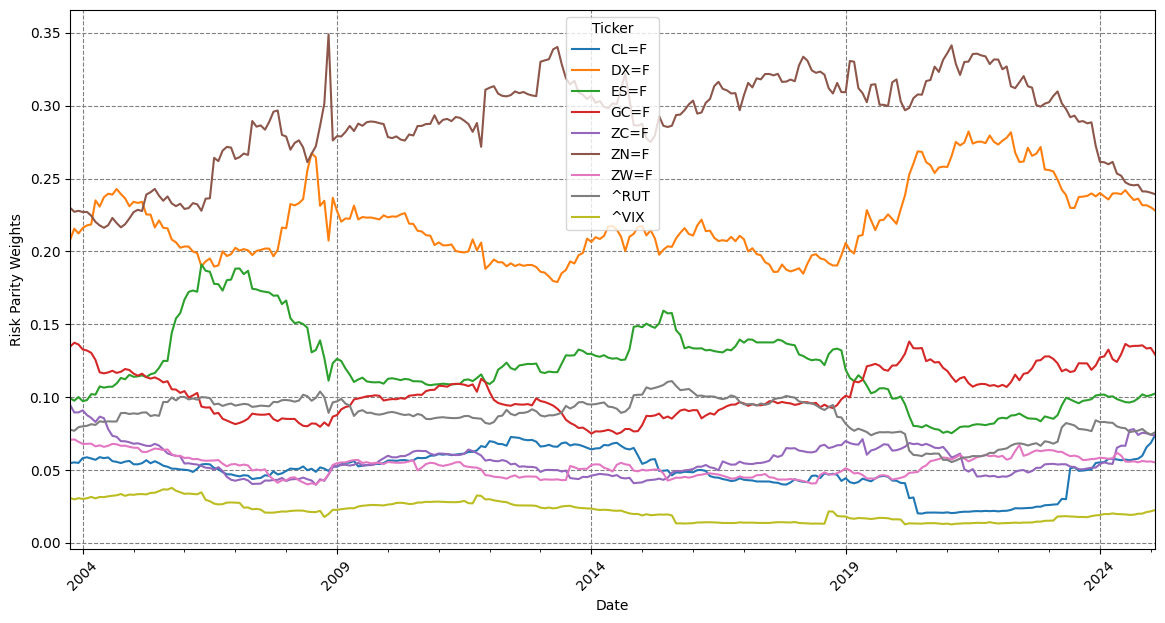

In [12]:
risk_parity_weights.plot(figsize=(14, 7))

plt.grid(True, which='major', linestyle='--', color='grey')
plt.xticks(rotation=45)
plt.ylabel('Risk Parity Weights')
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [13]:
# Calculate weighted returns
weighted_returns = (returns * risk_parity_weights).dropna()
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [14]:
print(risk_parity_portfolio_returns)

Date
2003-10-31    0.010592
2003-11-30    0.011220
2003-12-31    0.008428
2004-01-31    0.015109
2004-02-29    0.010499
                ...   
2024-10-31    0.007351
2024-11-30    0.004598
2024-12-31    0.008712
2025-01-31    0.017765
2025-02-28    0.006315
Freq: ME, Length: 257, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [15]:
# Evaluate portfolio performance
annual_mean_return = 12 * np.mean(risk_parity_portfolio_returns)
annual_volatility = (12 ** 0.5) * np.std(risk_parity_portfolio_returns)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurt()

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (running_max - cumulative_returns) / running_max
max_drawdown = np.max(drawdown)

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_std = (12 ** 0.5) * np.std(risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0])
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / max_drawdown

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0512
Annual Volatility: 0.0478
Skewness: -0.6059
Kurtosis: 2.5695
Maximum Drawdown: 0.1139
Sharpe Ratio: 1.0713
Sortino Ratio: 1.4159
Calmar Ratio: 0.4495


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


Mean Annual Return: 5.12%
Annual Volatility: 4.78%
Skewness: -0.6059
Kurtosis: 2.5695
Maximum Drawdown: 11.39%
Sharpe Ratio: 1.0713
Sortino Ratio: 1.4159
Calmar Ratio: 0.4495


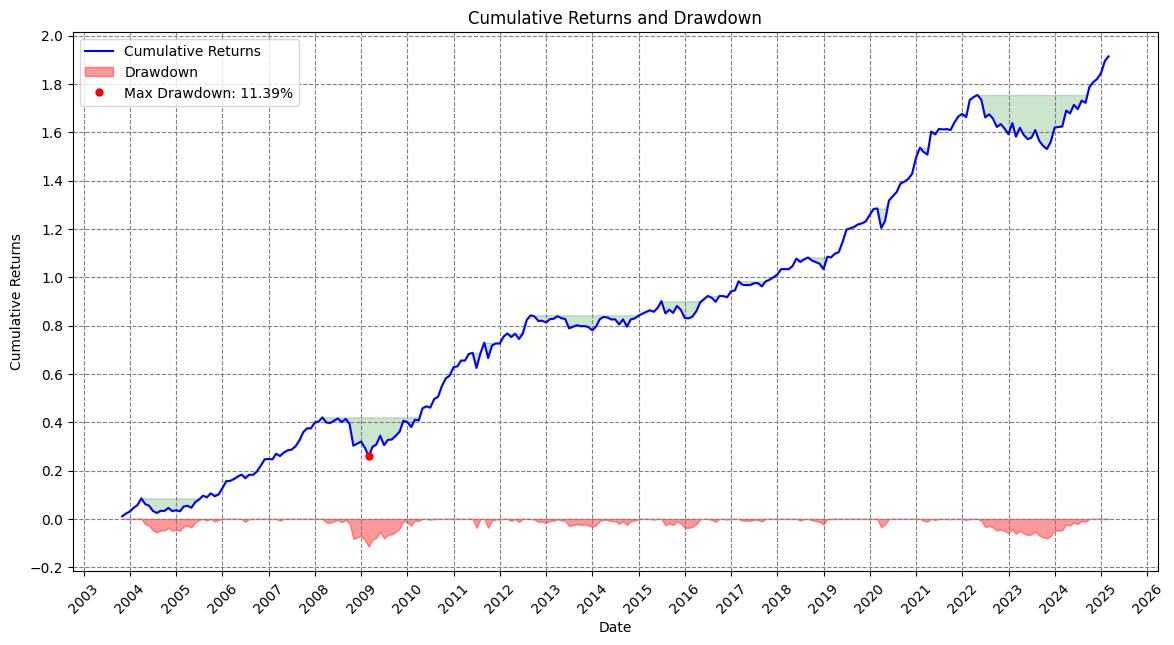

In [16]:
# Display results
print(f"Mean Annual Return: {annual_mean_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot((cumulative_returns - 1), label='Cumulative Returns', color='blue')

ax.fill_between(
    cumulative_returns.index,
    cumulative_returns - 1,
    running_max - 1,
    alpha=0.2,
    color="green"
)

ax.fill_between(
    cumulative_returns.index,
    -drawdown,
    alpha=0.4,
    color="red",
    label='Drawdown',
)

max_drawdown_index = drawdown.idxmax()
cum_return_value = cumulative_returns.loc[max_drawdown_index] - 1

ax.plot(max_drawdown_index, cum_return_value, 'ro', markersize=5, label=f'Max Drawdown: {max_drawdown:.2%}')

ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.grid(True, which='major', linestyle='--', color='grey')
plt.xticks(rotation=45)

ax.legend()
plt.show()

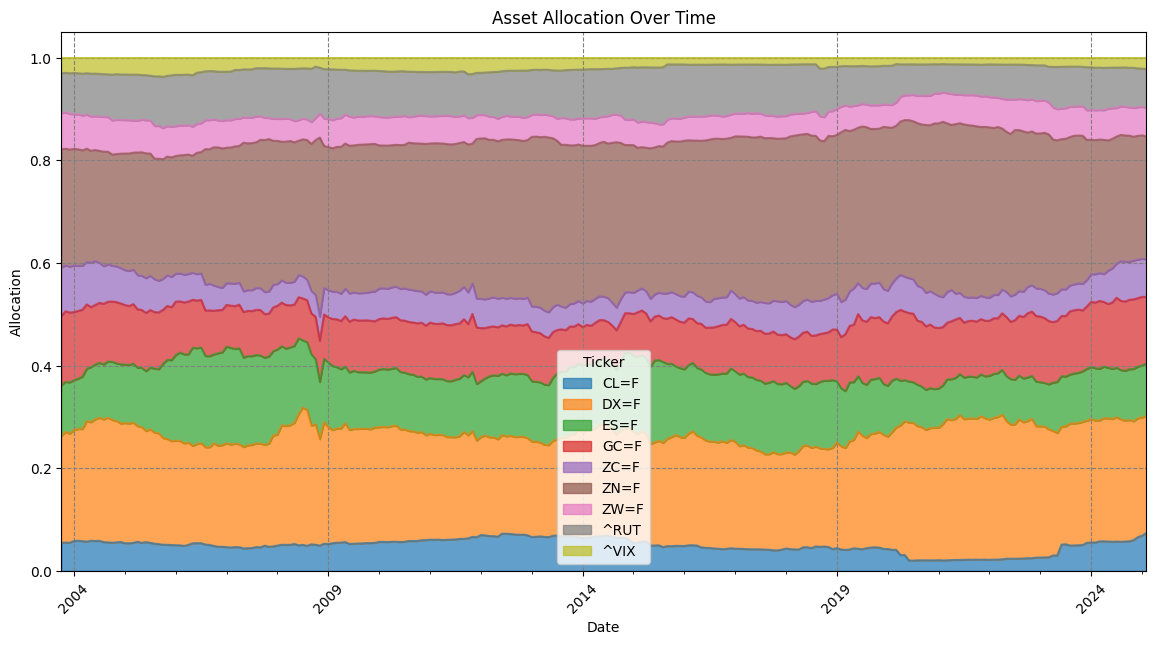

In [17]:
risk_parity_weights.plot(kind='area', figsize=(14, 7), stacked=True, alpha=0.7)

plt.grid(True, which='major', linestyle='--', color='grey')
plt.xticks(rotation=45)
plt.title('Asset Allocation Over Time')
plt.ylabel('Allocation')
plt.show()

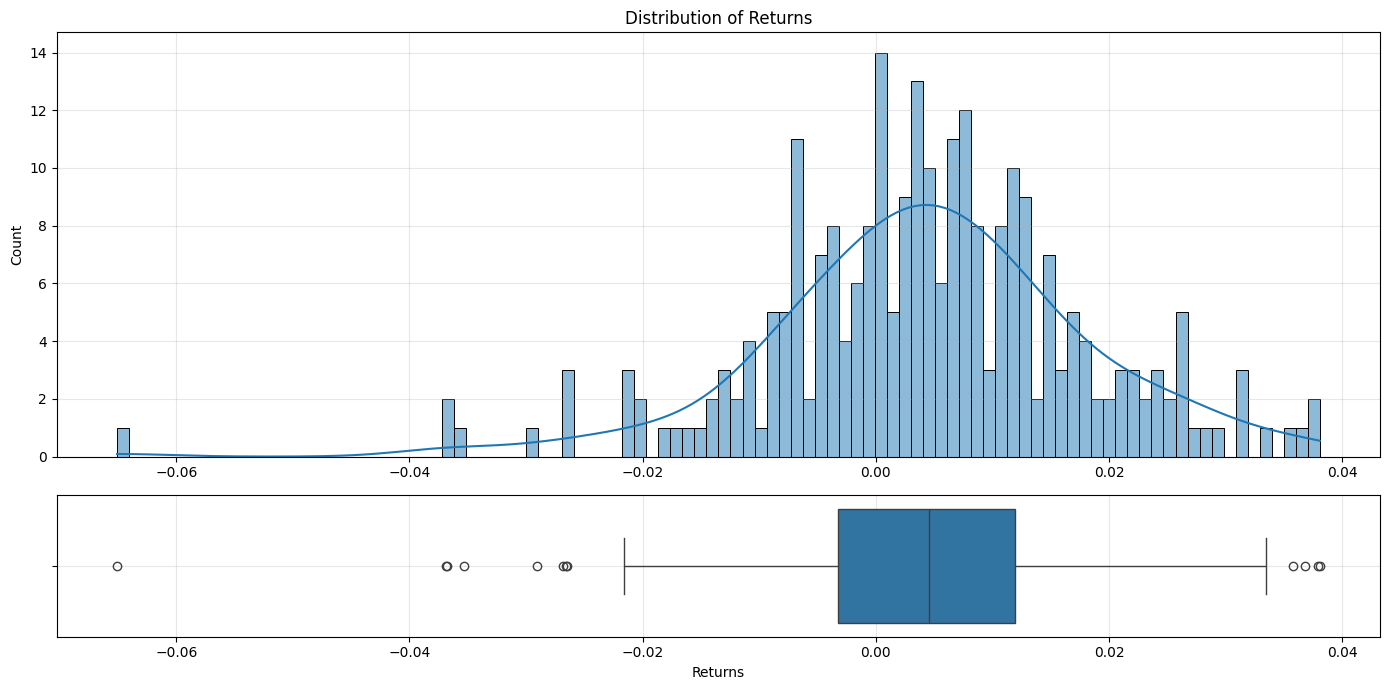

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), height_ratios=[3, 1])

# Histogram with KDE at the top
sns.histplot(data=risk_parity_portfolio_returns, bins=100, kde=True, ax=ax1)
ax1.set_title('Distribution of Returns')
ax1.grid(True, alpha=0.3)

# Boxplot at the bottom
sns.boxplot(x=risk_parity_portfolio_returns, ax=ax2)
ax2.set_xlabel('Returns')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A portfolio composed of the starting symbols `ES=F`, `ZN=F`, `GC=F`, `DX=F`, with a risk-parity strategy with a rolling volatility window of 36 months has the following metrics:

```txt
Mean Annual Return: 3.40%
Annual Volatility: 3.58%
Skewness: 0.2091
Kurtosis: 1.0665
Maximum Drawdown: 4.96%
Sharpe Ratio: 0.9506
Sortino Ratio: 1.6591
Calmar Ratio: 0.6865
```

The asset allocation over time seems to favor the least volatile assets like `DX=F` and `ZN=F`, which occupy 2/3 of the portfolio's weight.

Over the course of 21 years, this strategy has generated an accumulative return of approximately 105%.
The sharpe ratio is decent, indicating that for every unit of risk taken, the portfolio generates about 0.95 units of excess return.
The sortino ratio is also good, suggesting that the portfolio's returns are not only high but also low-risk relative to its downside volatility.
The calmar ratio suggest that during stress periods the strategy losses more than what it typically gains in a year, making it vulnerable to extreme market events, which could be seen in the 2008 housing bubble and the 2020 pandemic.
Overall, this portoflio has a decent and consistent performance, with a conservative risk profile with a relatively low volatility of 3.58%. The skewness (0.2091) and kurtosis (1.0665) values indicate that we have frequent small losses but occasional large gains, with flat tails in the distribution. While there is room for improvement in a drawdown management, the strategy's overal risk-adjusted performance metrics are reasonable.

---

After the running the notebook with the symbols mentioned above, I decided to include the following assets:

- `CL=F`: WTI Crude Oil Futures
- `ZC=F`: Corn Futures
- `ZW=F`: Wheat Futures
- `^VIX`: Volatility Index
- `^RUT`: Russell 2000 Index (Small Cap)

The main idea was to add commodities that can potentially add macro economic indicators to the model, and also to include a volatility index and a small cap index to add diversification and volatile assets that can help to move the returns up, knowing that this could also increase the risk of the portfolio.

The risk-adjusted performance metrics were the following:

```txt
Mean Annual Return: 5.12%
Annual Volatility: 4.78%
Skewness: -0.6059
Kurtosis: 2.5696
Maximum Drawdown: 11.39%
Sharpe Ratio: 1.0712
Sortino Ratio: 1.4158
Calmar Ratio: 0.4495
```

Because we have more volatile assets than the `DX=F` and `ZN=F`, the weight distribution is less conservative, as the least volatile assets occupy about 1/2 of the total weight.

Over the course of 21 years, this strategy has generated an accumulative return of approximately 190%.
The annual return is 1820 basis points better than the previous portfolio, and the annual volatiliy is also slightly higher than before (4.78%), but it is still within an acceptable range.
The sharpe ratio is slightly better, indicating that for every unit of risk taken, the portfolio generates about 1.07 units of excess return.
The sortino ratio is also good (slightly worst than before), suggesting that the portfolio's returns are not only high but also low-risk relative to its downside volatility.
The calmar ratio was in this case significantly worst, indicating that during stress periods the strategy losses more than what it typically gains in a year, making it vulnerable to extreme market events, which could be seen in the 2008 housing bubble and the 2020 pandemic.
Overall, this portoflio's accumulated return improved significantly, from 105% to 190%, at a cost of more than doubling the maximum drawdown, increasing the risk profile, which might be important for risk-sensitive investors. The skewness (-0.6059) and kurtosis (2.5696) values indicate that we have frequent small gains but occasional large losses, with relatively fatter tails in the distribution.